# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | holualoa
Processing Record 3 of Set 1 | lompoc
Processing Record 4 of Set 1 | kyshtovka
Processing Record 5 of Set 1 | thunder bay
Processing Record 6 of Set 1 | thakurgaon
Processing Record 7 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 8 of Set 1 | vredendal
Processing Record 9 of Set 1 | port augusta
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | papatowai
Processing Record 12 of Set 1 | flying fish cove
Processing Record 13 of Set 1 | karratha
Processing Record 14 of Set 1 | ust'-uda
Processing Record 15 of Set 1 | uturoa
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | acapulco de juarez
Processing Record 19 of Set 1 | chinde
Processing Record 20 of Set 1 | whitehorse
Processing Record 21 of Set 1 | tura
Processing Record 22

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,0.80,55,100,3.60,US,1741058408
1,holualoa,19.6228,-155.9522,24.91,70,100,3.60,US,1741058569
2,lompoc,34.6391,-120.4579,10.94,82,0,7.20,US,1741058570
3,kyshtovka,56.5550,76.6271,-16.91,93,100,0.78,RU,1741058571
4,thunder bay,48.4001,-89.3168,-3.01,86,100,0.51,CA,1741058309


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,0.80,55,100,3.60,US,1741058408
1,holualoa,19.6228,-155.9522,24.91,70,100,3.60,US,1741058569
2,lompoc,34.6391,-120.4579,10.94,82,0,7.20,US,1741058570
3,kyshtovka,56.5550,76.6271,-16.91,93,100,0.78,RU,1741058571
4,thunder bay,48.4001,-89.3168,-3.01,86,100,0.51,CA,1741058309


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

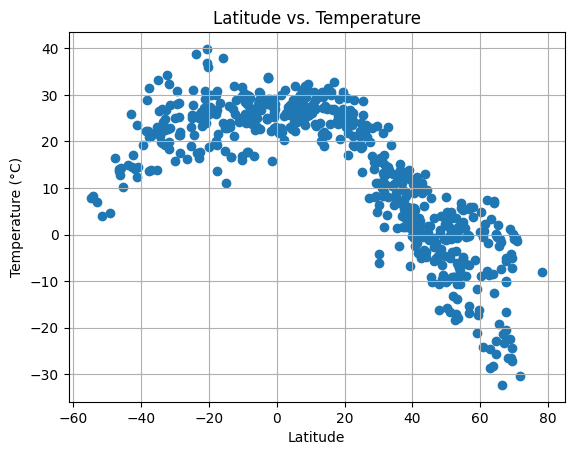

<Figure size 640x480 with 0 Axes>

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title('Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

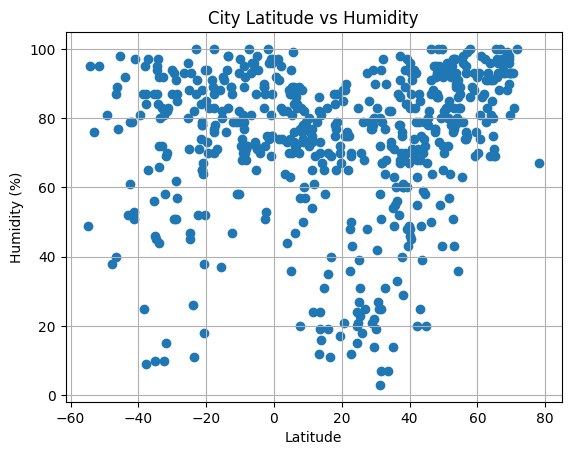

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

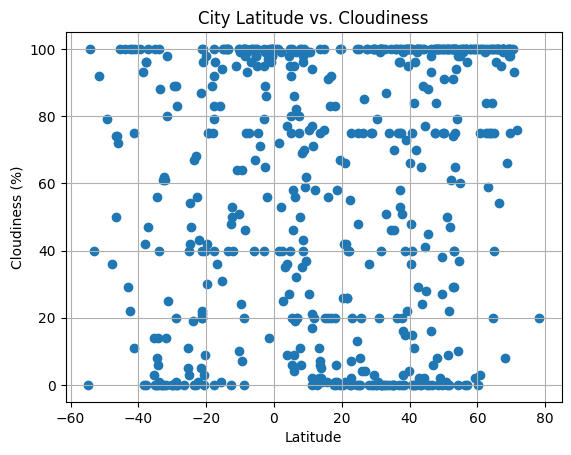

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])


# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

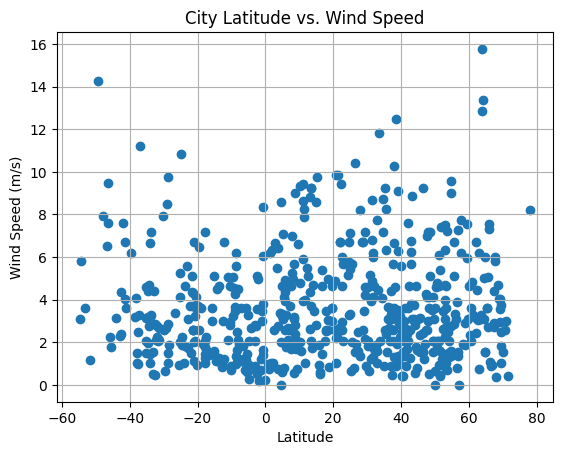

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])


# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def createRegress(x, y, xlabel, ylabel, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(f"The r^2-value is: {rvalue**2}")
    plt.scatter(x, y)
    plt.plot(x, regress_values,"r-")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")
    plt.title(title)
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,0.80,55,100,3.60,US,1741058408
1,holualoa,19.6228,-155.9522,24.91,70,100,3.60,US,1741058569
2,lompoc,34.6391,-120.4579,10.94,82,0,7.20,US,1741058570
3,kyshtovka,56.5550,76.6271,-16.91,93,100,0.78,RU,1741058571
4,thunder bay,48.4001,-89.3168,-3.01,86,100,0.51,CA,1741058309


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,vredendal,-31.6683,18.5012,19.85,82,80,2.04,ZA,1741058576
7,port augusta,-32.5000,137.7667,34.30,10,0,2.85,AU,1741058577
8,blackmans bay,-43.0167,147.3167,25.85,52,29,2.29,AU,1741058578
9,papatowai,-46.5619,169.4708,13.97,87,50,6.54,NZ,1741058580
10,flying fish cove,-10.4217,105.6791,29.82,79,51,4.63,CX,1741058581


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7829919620390291


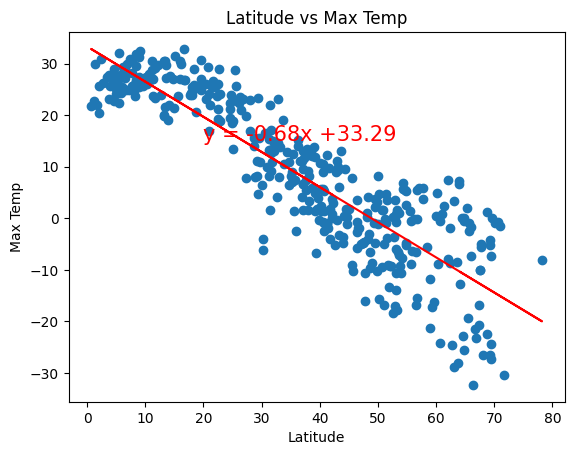

In [15]:
# Linear regression on Northern Hemisphere
createRegress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp", "Latitude vs Max Temp")

The r^2-value is: 0.2535077076524228


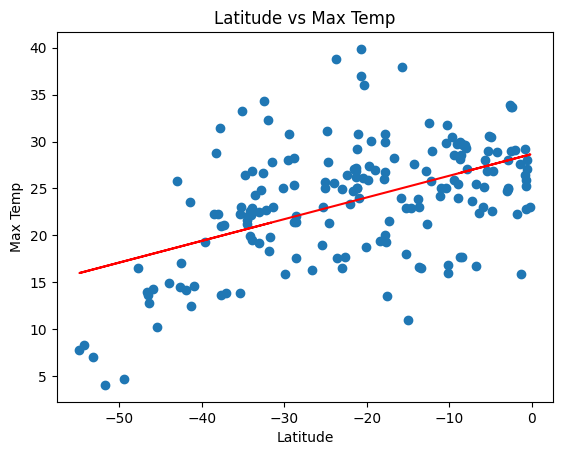

In [16]:
# Linear regression on Southern Hemisphere
createRegress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp", "Latitude vs Max Temp")

**Discussion about the linear relationship:** 
There is very high inverse correlation between latitude and temperature in the northern hemisphere with a r^2 value of 0.748 while a moderate positive correlation exists between latitude and temperature in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0984832614523745


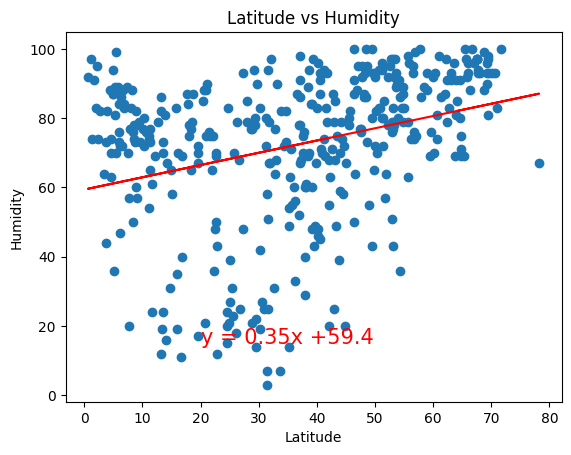

In [17]:
# Northern Hemisphere
createRegress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", "Latitude vs Humidity")

The r^2-value is: 0.041276605557921044


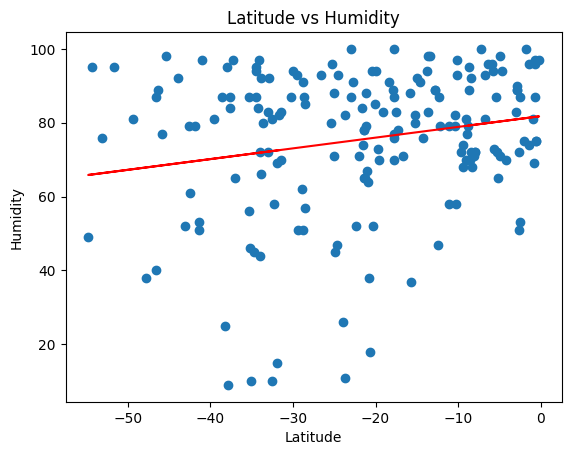

In [18]:
# Southern Hemisphere
createRegress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", "Latitude vs Humidity")

**Discussion about the linear relationship:** 
There exists a low correlation between latitude and humidity in the northern hemisphere with a r^2 value of 0.17 while there exists very insignificant or no correlation between latitude and humidity in the southern hemisphere with a r^2 value of 0.0001.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.0789844126769175


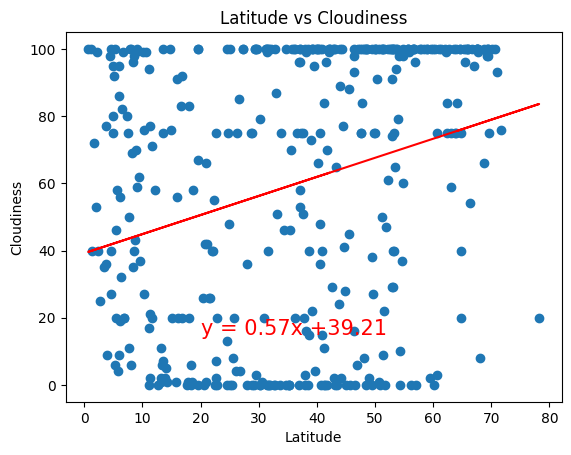

In [19]:
# Northern Hemisphere
createRegress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Latitude vs Cloudiness")

The r^2-value is: 0.09644088082485698


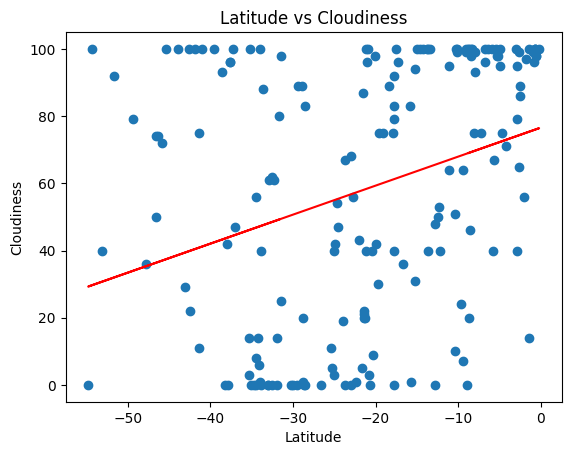

In [20]:
# Southern Hemisphere
createRegress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Latitude vs Cloudiness")

**Discussion about the linear relationship:** 
There exists a very insignificant or no correlation between latitude and cloudiness in the northern hemisphere with a r^2 value of 0.006 while there exists very insignificant or no correlation between latitude and cloudiness in the southern hemisphere with a r^2 value of 0.018.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0016453104598123172


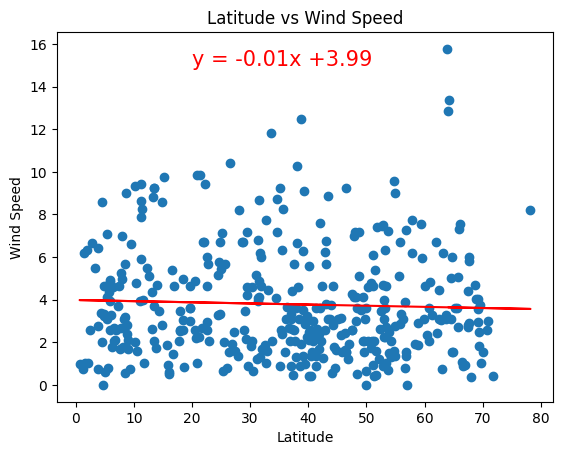

In [21]:
# Northern Hemisphere
createRegress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Latitude vs Wind Speed")

The r^2-value is: 0.0819633111640268


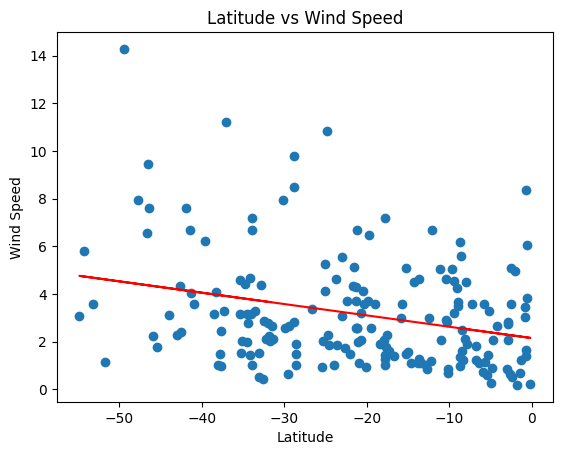

In [22]:
# Southern Hemisphere
createRegress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Latitude vs Wind Speed")

**Discussion about the linear relationship:** 
There exists a very insignificant or no correlation between latitude and wind speed in the northern hemisphere with a r^2 value of 0.0017 while there exists very weak correlation between latitude and cloudiness in the southern hemisphere with a r^2 value of 0.0648.